In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

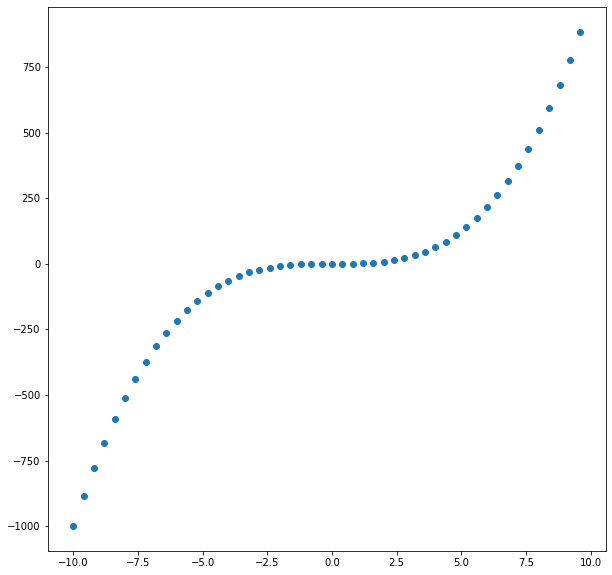

In [37]:
#Creating dummy data

plt.figure(figsize=(10,10))
x=np.arange(-10,10,0.4)
y=x**3
plt.scatter(x,y)
plt.show()

In [38]:
x=x.reshape(-1,1)
x

array([[-1.0000000e+01],
       [-9.6000000e+00],
       [-9.2000000e+00],
       [-8.8000000e+00],
       [-8.4000000e+00],
       [-8.0000000e+00],
       [-7.6000000e+00],
       [-7.2000000e+00],
       [-6.8000000e+00],
       [-6.4000000e+00],
       [-6.0000000e+00],
       [-5.6000000e+00],
       [-5.2000000e+00],
       [-4.8000000e+00],
       [-4.4000000e+00],
       [-4.0000000e+00],
       [-3.6000000e+00],
       [-3.2000000e+00],
       [-2.8000000e+00],
       [-2.4000000e+00],
       [-2.0000000e+00],
       [-1.6000000e+00],
       [-1.2000000e+00],
       [-8.0000000e-01],
       [-4.0000000e-01],
       [ 8.8817842e-15],
       [ 4.0000000e-01],
       [ 8.0000000e-01],
       [ 1.2000000e+00],
       [ 1.6000000e+00],
       [ 2.0000000e+00],
       [ 2.4000000e+00],
       [ 2.8000000e+00],
       [ 3.2000000e+00],
       [ 3.6000000e+00],
       [ 4.0000000e+00],
       [ 4.4000000e+00],
       [ 4.8000000e+00],
       [ 5.2000000e+00],
       [ 5.6000000e+00],


In [39]:
class LOWESS():
    def __init__(self):
        pass
    
    def weights(self,x_train,x,bw):                              #x is one query point(1 test sample from the entire test set)
        return np.e**(-(((x_train-x)**2).sum(axis=1)/(2*bw*bw)))        #numpy array containing Wi for all i (training examples)
    
    def theta(self,x_train,y_train,x,bw):                   #x is one query point(1 test sample from the entire test set)
        
        w=self.weights(x_train,x,bw)                        #1d array of weights for each i (trainng examples)
        print(w)
        w=w.reshape(-1,1)                                   #converting to column major form (multiple rows,1 col)
        
        thetas=np.dot(np.linalg.inv(np.dot(x_train.T,(w*x_train))),np.dot(x_train.T,w*(y_train.reshape(-1,1))))
        
        return thetas
    
    def predict(self,x_train,y_train,x_test,bw):
        predictions=[]
        
        for test_j in x_test:                               #test_j denotes 1 query point(test sample)
            params=self.theta(x_train,y_train,test_j,bw)    #params is an array (multiple rows(N),1 column)
            
            prediction=np.dot(test_j,params.flatten())
            
            predictions.append(prediction)
            
        return np.array(predictions)

In [46]:
reg=LOWESS()
p=reg.predict(x,y,x,0.5)

[1.00000000e+000 7.26149037e-001 2.78037300e-001 5.61347628e-002
 5.97602290e-003 3.35462628e-004 9.92950431e-006 1.54975314e-007
 1.27540763e-009 5.53461007e-012 1.26641655e-014 1.52797997e-017
 9.72098502e-021 3.26102718e-024 5.76832996e-028 5.38018616e-032
 2.64603779e-036 6.86193048e-041 9.38313827e-046 6.76552418e-051
 2.57220937e-056 5.15659133e-062 5.45093048e-068 3.03829615e-074
 8.92978691e-081 1.38389653e-087 1.13088300e-094 4.87285246e-102
 1.10713449e-109 1.32638325e-117 8.37894253e-126 2.79100700e-134
 4.90212262e-143 4.54003234e-152 2.21709986e-161 5.70904011e-171
 7.75161983e-181 5.54974933e-191 2.09510504e-201 4.17051577e-212
 4.37749104e-223 2.42277060e-234 7.07051186e-246 1.08803019e-257
 8.82841157e-270 3.77724997e-282 8.52158565e-295 1.01371677e-307
 6.35862486e-321 0.00000000e+000]
[7.26149037e-001 1.00000000e+000 7.26149037e-001 2.78037300e-001
 5.61347628e-002 5.97602290e-003 3.35462628e-004 9.92950431e-006
 1.54975314e-007 1.27540763e-009 5.53461007e-012 1.26641

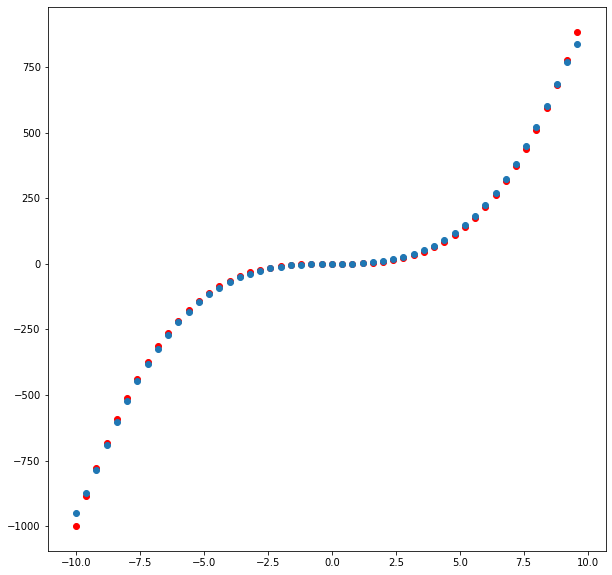

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,color="red")               #plot of actual training data
plt.scatter(x,p)                           #plot of testing data (testing data is same as training data x_test=x_train)
plt.show()